In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('final_dataset.csv')

### **Общая информация**

In [3]:
data.head(3)

,Unnamed: 0,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,netustm,nwspol,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,0,50014,65,5,1,4,8,AT,180,90,...,5,5,6,9,10,5,1,6,6,8
1,1,50030,21,0,2,7,9,AT,570,90,...,2,2,6,6,4,1,1,2,7,10
2,2,50057,53,8,2,4,9,AT,30,30,...,4,3,7,5,8,4,1,6,6,5


**Описание признаков**
- idno - номер респондента
- agea - возраст респондента
- rlgdgr - насколько респондент религиозен
- polintr - насколько респондент заинтересован в политике
- sclmeet - как часто респондент встречается с друзьями, родственниками или коллегами
- happy - насколько счастлив респондент
- cntry -  страна проведения опроса
- netustm - сколько времени респондент обычно проводит в интернете, в минутах
- nwspol - сколько времени респондент удеяет чтению, прослушиванию, просмотру новостей о политике и текущих событиях. в минутах
- pplfair - большинство людей пытаются использовать вас в своих интересах или стараются относиться к вам справедливо?

**признаки с 11-22**
- health - здоровье
- sclmeet - встречи с друзьями
- atchctr - патриотизм
- aesfdrk - чувство безопасности на улице
- dscrgrp - дискриминация
- hhmmb - кол-во человек в семье
- gndr - гендер
- yrbrn - год рождения
- impdiffa - открытость к новому
- impfuna - желание веселиться

**признаки с 23-34**
- ipsucesa - важно быть успешным и признания достижений другими людьми
- enjlf -  наслаждались жизнью, как часто за прошлую неделю
- fltdpr - чувствовали себя одиноким, как часто за прошлую неделю
- fltlnl - сколько времени за прошлую неделю вы чувствовали себя одиноким
- slprl -  как часто за прошлую неделю сон был беспокойным,
- dosprt - занимались ли вы спортом или другой физической активностью, сколько дней из последних 7
- cgtsmok  - отношение к курению
- alcfreq - как часто вы принимали алкоголь за последний год
- height - рост респондента
- weighta - вес респондента
- fnsdfml - как часто были серьезные конфликты между членами семьи в период взросления

*заполнить на русском*

In [4]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop(columns = ['sclmeet.1','yrbrn'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idno      40156 non-null  int64 
 1   agea      40156 non-null  int64 
 2   rlgdgr    40156 non-null  int64 
 3   polintr   40156 non-null  int64 
 4   sclmeet   40156 non-null  int64 
 5   happy     40156 non-null  int64 
 6   cntry     40156 non-null  object
 7   netustm   40156 non-null  int64 
 8   nwspol    40156 non-null  int64 
 9   pplfair   40156 non-null  int64 
 10  health    40156 non-null  int64 
 11  atchctr   40156 non-null  int64 
 12  aesfdrk   40156 non-null  int64 
 13  dscrgrp   40156 non-null  int64 
 14  pray      40156 non-null  int64 
 15  hhmmb     40156 non-null  int64 
 16  gndr      40156 non-null  int64 
 17  impdiffa  40156 non-null  int64 
 18  impfuna   40156 non-null  int64 
 19  impsafea  40156 non-null  int64 
 20  iphlppla  40156 non-null  int64 
 21  ipsucesa  40

In [6]:
# явные дубликаты
data.duplicated().sum()

0

In [7]:
data.describe()

,idno,agea,rlgdgr,polintr,sclmeet,happy,netustm,nwspol,pplfair,health,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
count,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,...,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000
mean,69002.327996,58.062705,5.296344,2.632683,4.940557,7.741433,1658.262700,207.197779,6.131985,2.153775,...,2.211401,2.289048,6.204627,7.045821,7.221561,4.945413,1.381886,5.935228,7.749278,8.796892
std,11212.160887,79.637641,6.955249,0.960560,3.777767,4.773365,2705.045954,1009.336526,6.276457,0.928276,...,1.275698,1.270549,11.652521,11.209156,7.636108,10.279775,0.841324,10.759571,14.406229,16.685319
min,50002.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,59407.000000,37.000000,2.000000,2.000000,4.000000,7.000000,120.000000,30.000000,4.000000,1.000000,...,1.000000,1.000000,3.000000,4.000000,5.000000,2.000000,1.000000,3.000000,3.000000,4.000000
50%,68818.000000,53.000000,5.000000,3.000000,5.000000,8.000000,240.000000,60.000000,6.000000,2.000000,...,2.000000,2.000000,5.000000,6.000000,7.000000,4.000000,1.000000,5.000000,5.000000,6.000000
75%,78245.250000,67.000000,7.000000,3.000000,6.000000,9.000000,600.000000,120.000000,7.000000,3.000000,...,3.000000,3.000000,7.000000,8.000000,8.000000,6.000000,2.000000,6.000000,7.000000,7.000000
max,99403.000000,999.000000,99.000000,9.000000,99.000000,99.000000,9999.000000,9999.000000,99.000000,9.000000,...,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,9.000000,99.000000,99.000000,99.000000


### **Пропущенные значения**

In [8]:
# замена бинарных значений

data['dscrgrp'] = data['dscrgrp'].replace({2: 0})
data['gndr'] = data['gndr'].replace({2: 0})

In [9]:
# замена значений: (как выражены отсуствующие значения): [названия столбцов]
# idno, сntry, paccnt, uempla - нет пропущенных значений

replacement_dict = {
    (6, 7, 8, 9): ['emplrel', 'uemp12m', 'eisced'],
    (7, 8, 9): ['health', 'aesfdrk', 'dscrgrp', 'gndr', 'polintr', 'cptppola', 'vote', 'fnsdfml', 'actrolga', 'cnfpplh', 'hincfel', 'cgtsmok', 'enjlf', 'fltdpr', 'fltlnl',  'slprl'],
    (66, 77, 88, 99): ['happy', 'marsts', 'eisced',
                       'alcfreq', 'ipsucesa', 'dosprt',
                       'impsafea', 'iphlppla',
                       'atchctr', 'pray', 'hhmmb', 'impdiffa', 'impfuna',
                       'pplfair', 'happy', 'sclmeet', 'rlgdgr',
                       'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'stfeco', 'stfdem', 'stfedu'],
    (777, 888, 999): ['agea', 'weighta', 'height'],
    (6666, 7777, 8888, 9999): ['netustm', 'nwspol']
    }

In [10]:
# заменяем значения выше на nan чтобы дальше было удобнее работать с ними

for values, columns in replacement_dict.items():
  for i in columns:
    data[i] = data[i].replace(values, np.nan)

In [11]:
# считаем кол-во пропущенных значений по столбцам

missing_counts = {col: data[col].isnull().sum() for columns in replacement_dict.values() for col in columns if col in data.columns}
print("Количество пропущенных значений:")

for col, count in missing_counts.items():
    share = round(count / len(data) * 100)
    print(f"{col}: {count}, доля от всех данных: {share}%")

Количество пропущенных значений:
emplrel: 3944, доля от всех данных: 10%
uemp12m: 29866, доля от всех данных: 74%
eisced: 10874, доля от всех данных: 27%
health: 53, доля от всех данных: 0%
aesfdrk: 295, доля от всех данных: 1%
dscrgrp: 270, доля от всех данных: 1%
gndr: 0, доля от всех данных: 0%
polintr: 56, доля от всех данных: 0%
cptppola: 579, доля от всех данных: 1%
vote: 360, доля от всех данных: 1%
fnsdfml: 557, доля от всех данных: 1%
actrolga: 597, доля от всех данных: 1%
cnfpplh: 428, доля от всех данных: 1%
hincfel: 451, доля от всех данных: 1%
cgtsmok: 81, доля от всех данных: 0%
enjlf: 278, доля от всех данных: 1%
fltdpr: 175, доля от всех данных: 0%
fltlnl: 173, доля от всех данных: 0%
slprl: 139, доля от всех данных: 0%
happy: 132, доля от всех данных: 0%
marsts: 19548, доля от всех данных: 49%
alcfreq: 179, доля от всех данных: 0%
ipsucesa: 773, доля от всех данных: 2%
dosprt: 438, доля от всех данных: 1%
impsafea: 639, доля от всех данных: 2%
iphlppla: 642, доля от вс

In [12]:
# удаляем столбцы

data_20 = data.drop(['uemp12m', 'marsts', 'eisced', 'netustm'], axis=1)
data_45 = data.drop(['uemp12m', 'marsts'], axis=1)

In [13]:
data_20 = data_20.dropna()
data_20.shape

(28318, 46)

In [14]:
data_45 = data_45.dropna()
data_45.shape

(15006, 48)

**Выводы**

- столбцы с аномальным кол-вом пропущенных значений, которые подлежат удалению: **uemp12m** (74%) (была ли безработица в теч. года), **marsts** (49%) (семейное положение), **eisced** (27%) (уровень образования), **netustm** (22%) (пользование интернетом в день)
- в неудаленных столбцах убираем строки с nan-значениями
- порог удаления столбцов (1): >20% пропущенных значений + убираем все оставшиеся nan в строках => в датасете остается 28к строк
- порог удаления столбцов (2) >45% + убираем все оставшиеся nan в строках => в датасете остается 15к строк
- проверим качество моделей для двух разных порогов

### **Выбросы**

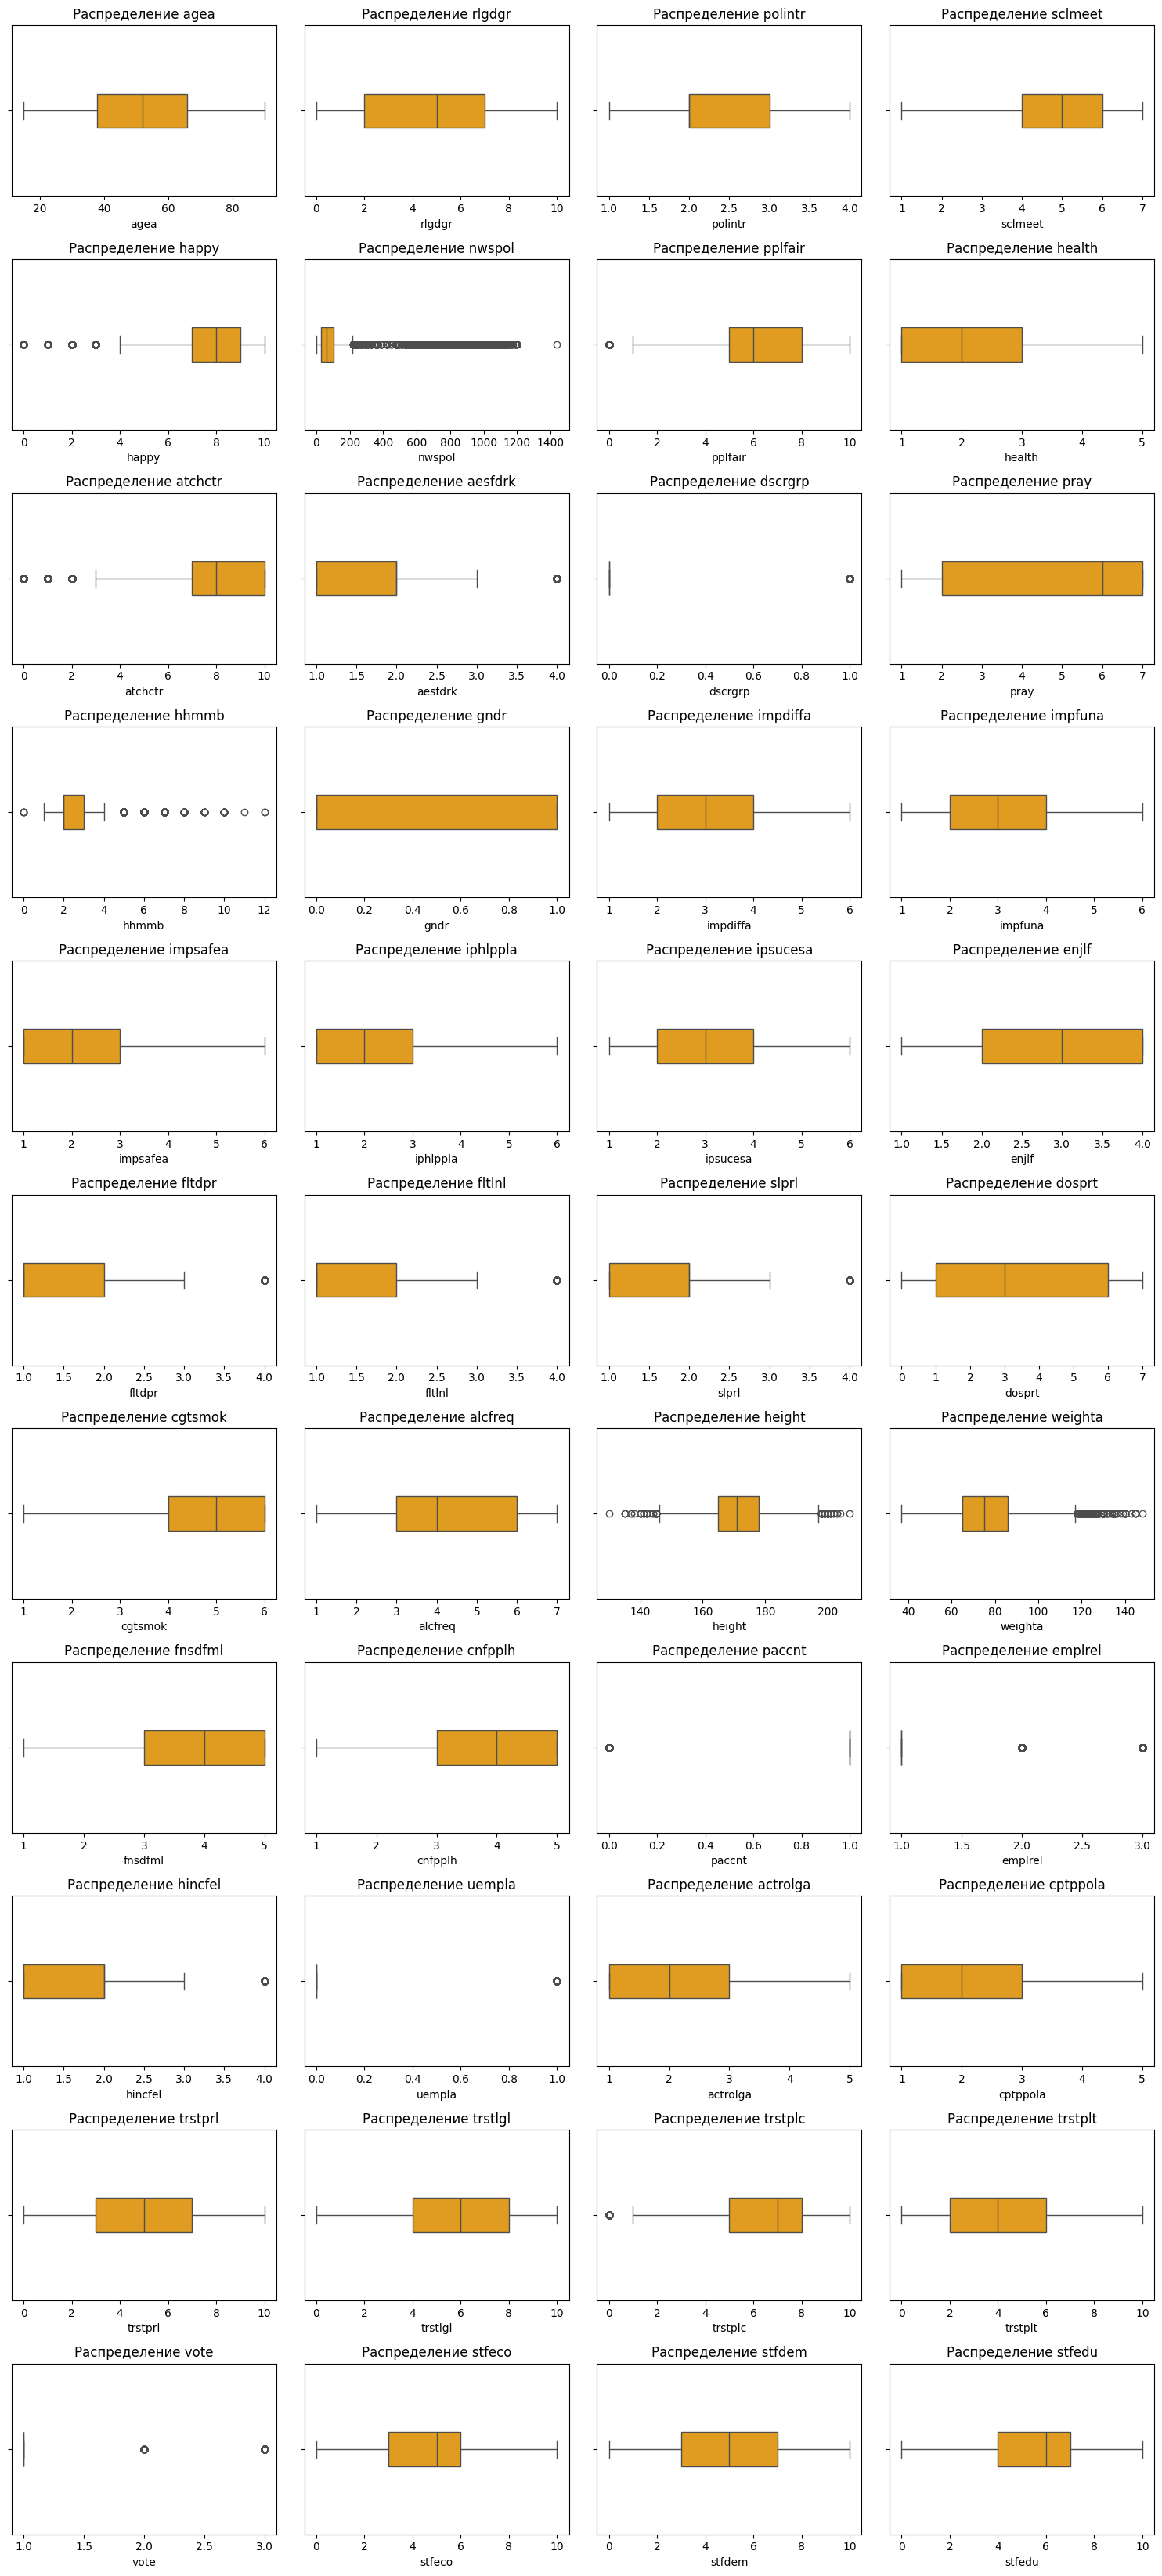

In [ ]:
# построим боксплоты
columns_boxplot = data_20.drop(columns=['idno','cntry'])
num_columns = len(columns_boxplot.columns)

nrows = int(np.ceil(num_columns / 4))
ncols = min(num_columns, 4)

plt.figure(figsize=(15, nrows * 3))

for i, column in enumerate(columns_boxplot.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=data_20[column], width=0.2, color = 'orange')
    plt.title(f'Распределение {column}')

plt.tight_layout()
plt.show()

In [ ]:
def check_data_quality(df, columns):
    """
    Проверяет данные на наличие выбросов, ошибок и пропусков.
    """
    quality_report = pd.DataFrame(index=columns)

    # Подсчет пропусков
    quality_report["Missing Values"] = df[columns].isnull().sum()

    # Подсчет уникальных значений
    quality_report["Unique Values"] = df[columns].nunique()

    # Поиск аномальных значений (за пределами 1.5 * IQR)
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:  # Только для числовых данных
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            quality_report.loc[col, "Outliers"] = outliers
            quality_report.loc[col, "Outliers Percentage"] = round(outliers/data_20.shape[0]*100,2)
        else:
            quality_report.loc[col, "Outliers"] = 0

    return quality_report

# Выполним проверку данных
data_quality_df = check_data_quality(data_20, data_20.columns)
data_quality_df.query('Outliers > 0')

,Missing Values,Unique Values,Outliers,Outliers Percentage
happy,0,11,798.0,2.82
nwspol,0,582,2054.0,7.25
pplfair,0,11,656.0,2.32
atchctr,0,11,768.0,2.71
aesfdrk,0,4,740.0,2.61
dscrgrp,0,2,2116.0,7.47
hhmmb,0,13,2110.0,7.45
fltdpr,0,4,334.0,1.18
fltlnl,0,4,482.0,1.70
slprl,0,4,1250.0,4.41


**Выводы**

### **Распределения**

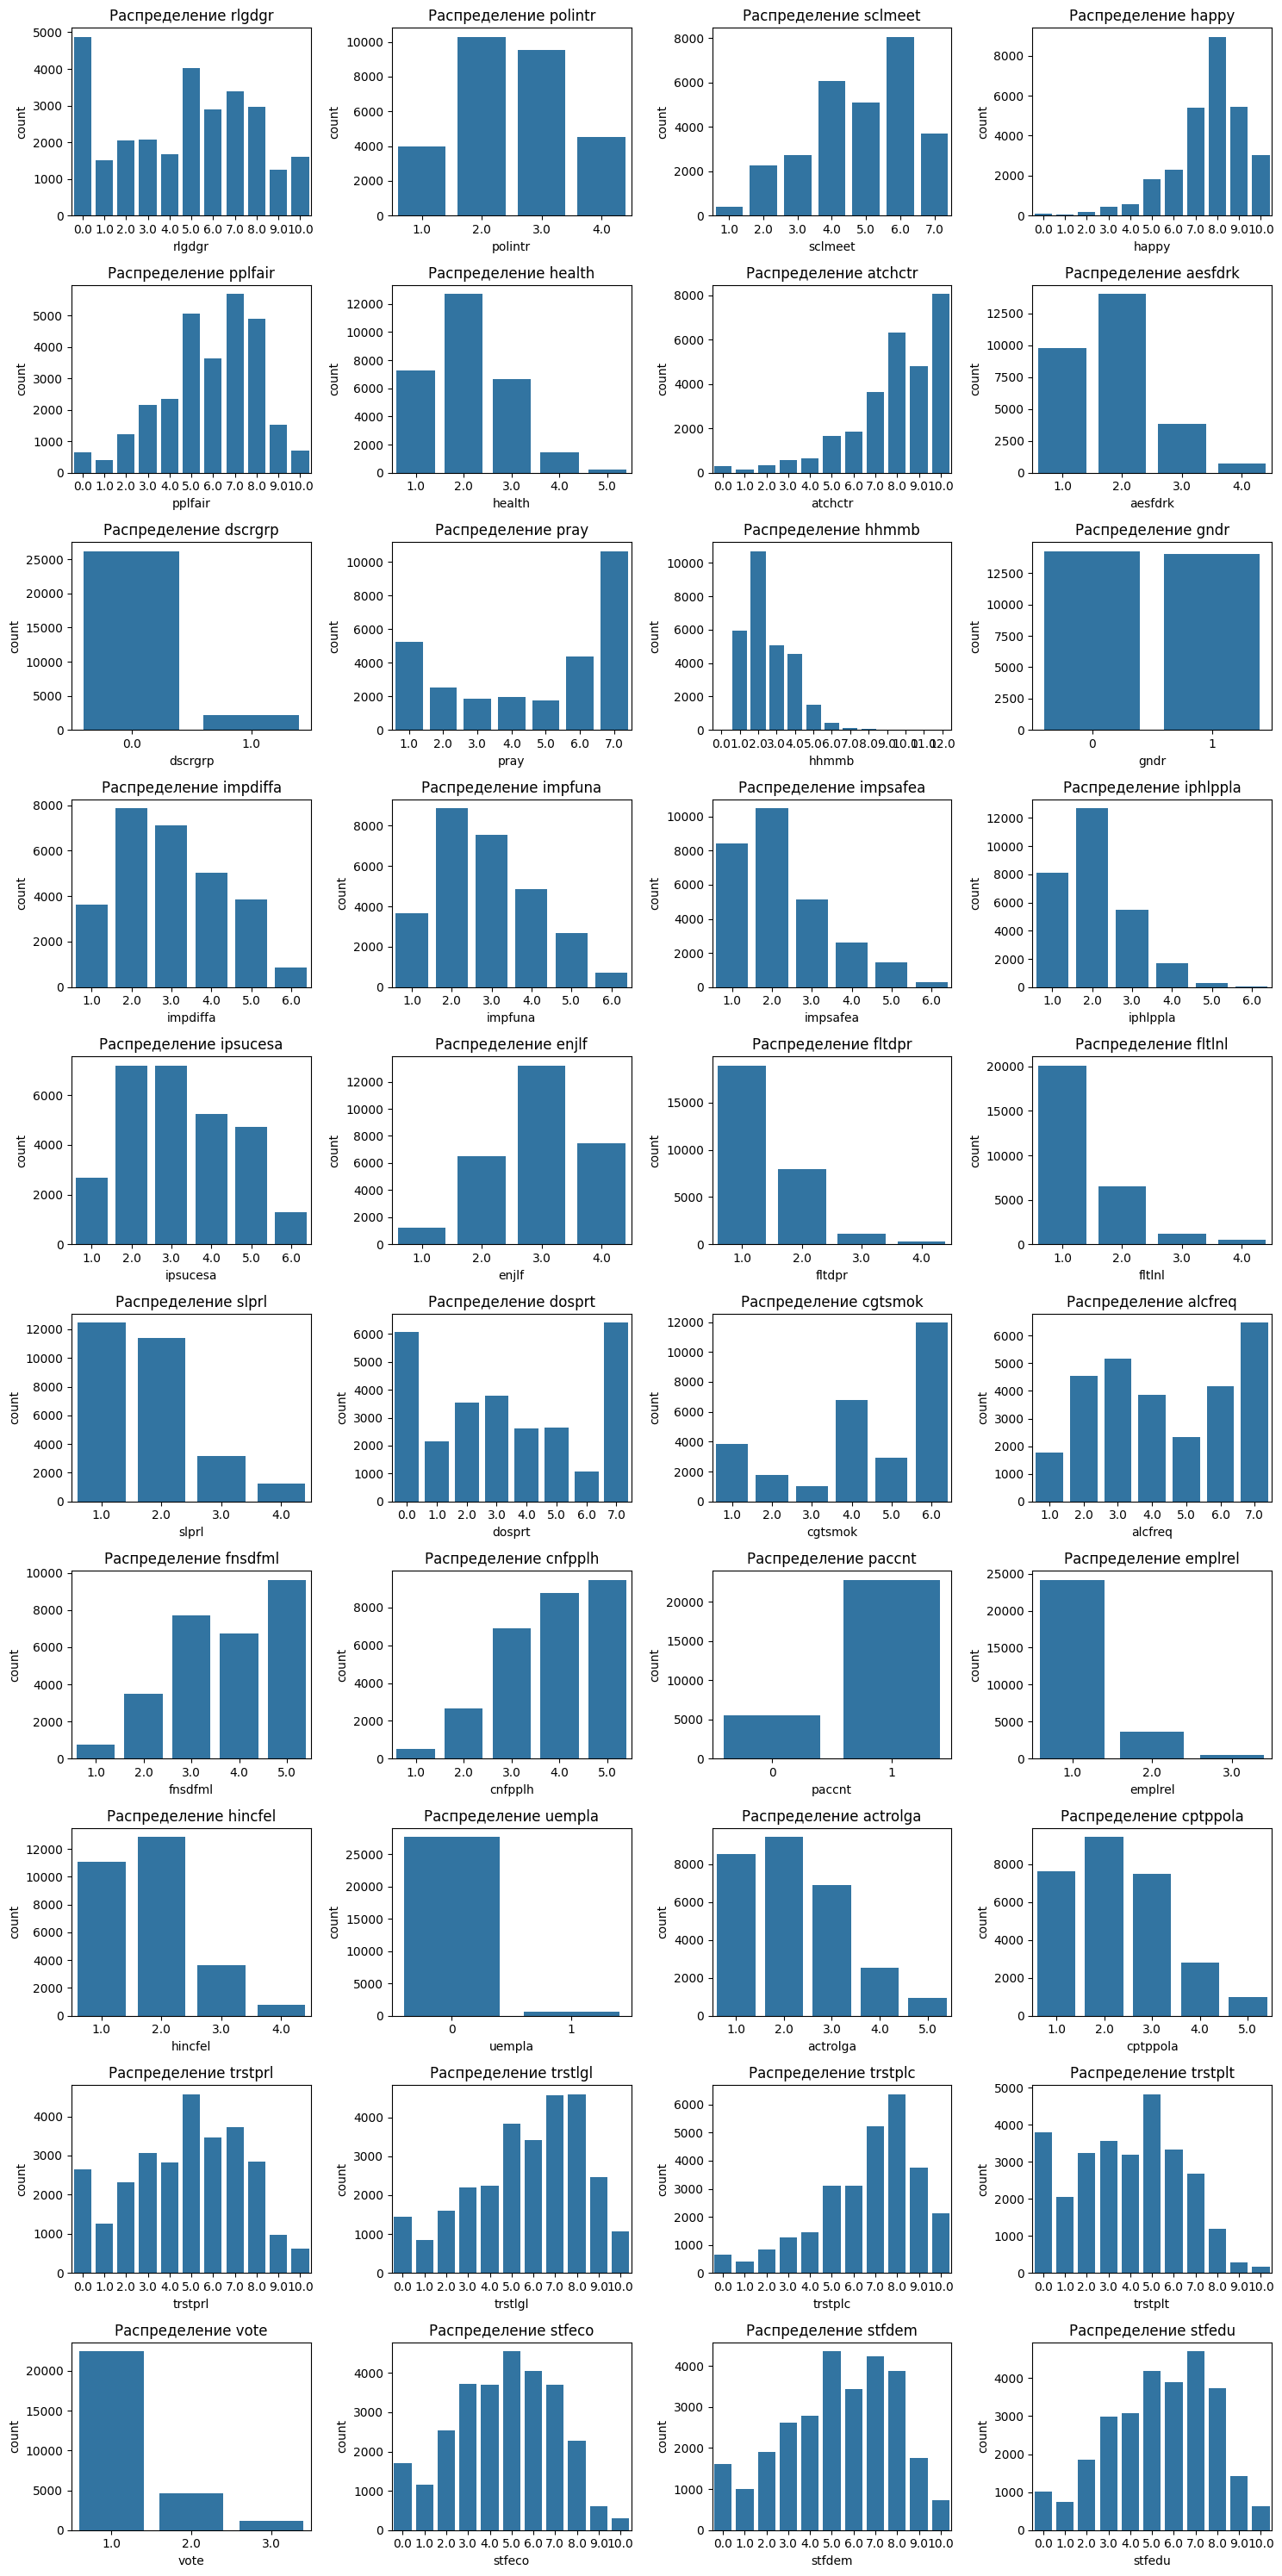

In [ ]:
columns_countplot = columns_boxplot.drop(columns=['weighta','height', 'agea', 'nwspol'])
num_columns = len(columns_countplot.columns)

nrows = int(np.ceil(num_columns / 4))
ncols = min(num_columns, 4)

plt.figure(figsize=(15, nrows * 3))

for i, column in enumerate(columns_countplot.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(x=column, data=data_20)
    plt.title(f'Распределение {column}')

plt.tight_layout()
plt.show()

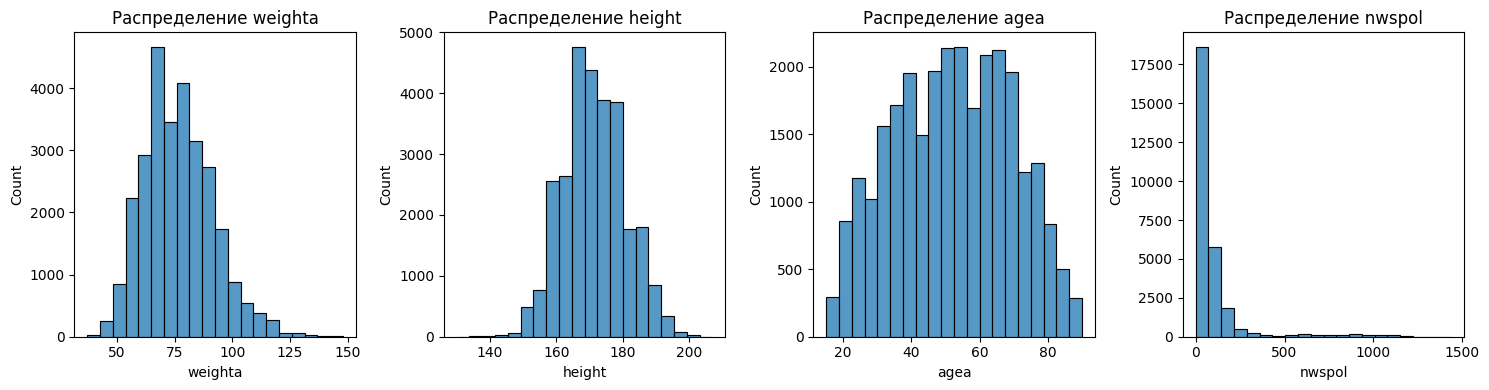

In [ ]:
plt.figure(figsize=(15, 4))

for i, column in enumerate(data_20[['weighta','height', 'agea','nwspol']], 1):
    plt.subplot(1, 4, i)
    sns.histplot(x=column, data=data_20, bins=20)
    plt.title(f'Распределение {column}')

plt.tight_layout()
plt.show()

**Выводы:**

- ipsucesa - большинство ответило, что признание успеха важно для них, это 2 и медиана - 3.

- enjlf - большинство респондентов отчетили, что за прошлую неделю чувствовали себя счастливыми большую часть времени -3.

- fltdpr - большинство не чувствовали себя одинокими за прошлую неделю.

- fltlnl - на вопрос: как часто за прошлую неделю вы чувствовали себя одиноким, большинство ответили никогда или иногда.

- slprl - на вопрос как часто за прошлую неделю сон был беспокойным большинство ответило никогда или иногда.

- dosprt - занимались ли вы спортом или другой физической активностью, сколько из последних 7 дней. Здесь мнения разделились, примерно одинаковое количество занимается спортом каждый день в неделю и не занимается спортом.

- cgtsmok - Большинство респондентов не курящие.

- alcfreq - В целом, большая часть употребляет алкоголь не чаще несколько раз в неделю, медианное значение 2-3 раза в месяц.

- height - рост респондента, средний рост - 171 см, совпадает с медианным значением, стандартное отклонение - 9 см.

- weighta - вес респондента, средний вес - 76 кг, медианное значение - 75 кг, стандартное отклонение - 15,6 кг.

- fnsdfml - У большинства серьезных конфликтов в детстве не было.

In [ ]:
# построить график: карта на которой отмечены страны, люди из которых принимали участие в опросах

In [22]:
countries = pd.DataFrame(data_20.groupby('cntry')['idno'].nunique()).reset_index()
countries_dict = {"AT": "Austria",
                  "BE": "Belgium",
                  "CH": "Switzerland",
                  "CY": "Cyprus",
                  "DE": "Germany",
                  "ES": "Spain",
                  "FI": "Finland",
                  "FR": "France",
                  "GB": "United Kingdom",
                  "GR": "Greece",
                  "HR": "Croatia",
                  "HU": "Hungary",
                  "IE": "Ireland",
                  "IS": "Iceland",
                  "IT": "Italy",
                  "LT": "Lithuania",
                  "NL": "Netherlands",
                  "NO": "Norway",
                  "PL": "Poland",
                  "PT": "Portugal",
                  "RS": "Serbia",
                  "SE": "Sweden",
                  "SI": "Slovenia",
                  "SK": "Slovakia"
}
countries['name'] = countries['cntry'].map(countries_dict)
countries.head(3)

,cntry,idno,name
0,AT,1647,Austria
1,BE,1241,Belgium
2,CH,1001,Switzerland


In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Фильтруем страны Европы
europe = world[world['CONTINENT'] == 'Europe']
europe = europe.merge(countries, how='left', left_on='NAME', right_on='name')
europe['idno'] = europe['idno'].fillna(0)

plt.figure(figsize=(12, 8))
fig = px.scatter_geo(europe,
                     locations="ISO_A3",  # Код страны ISO A3
                     size="idno",  # Размер метки зависит от количества участников
                     hover_name="NAME",  # Название страны при наведении
                     projection="natural earth",  # Проекция карты
                     title="Количество участников в опросе по странам Европы",
                     scope='europe')

# Показываем карту
fig.show()

<Figure size 1200x800 with 0 Axes>

### Выводы
- ту ту ту
- пу пу пу

### **Корреляции**

In [ ]:
# построим матрицу корреляций
df_corr = data_20.drop(columns=['idno','cntry'], axis=1)
correlation_matrix = df_corr.corr(method='spearman')

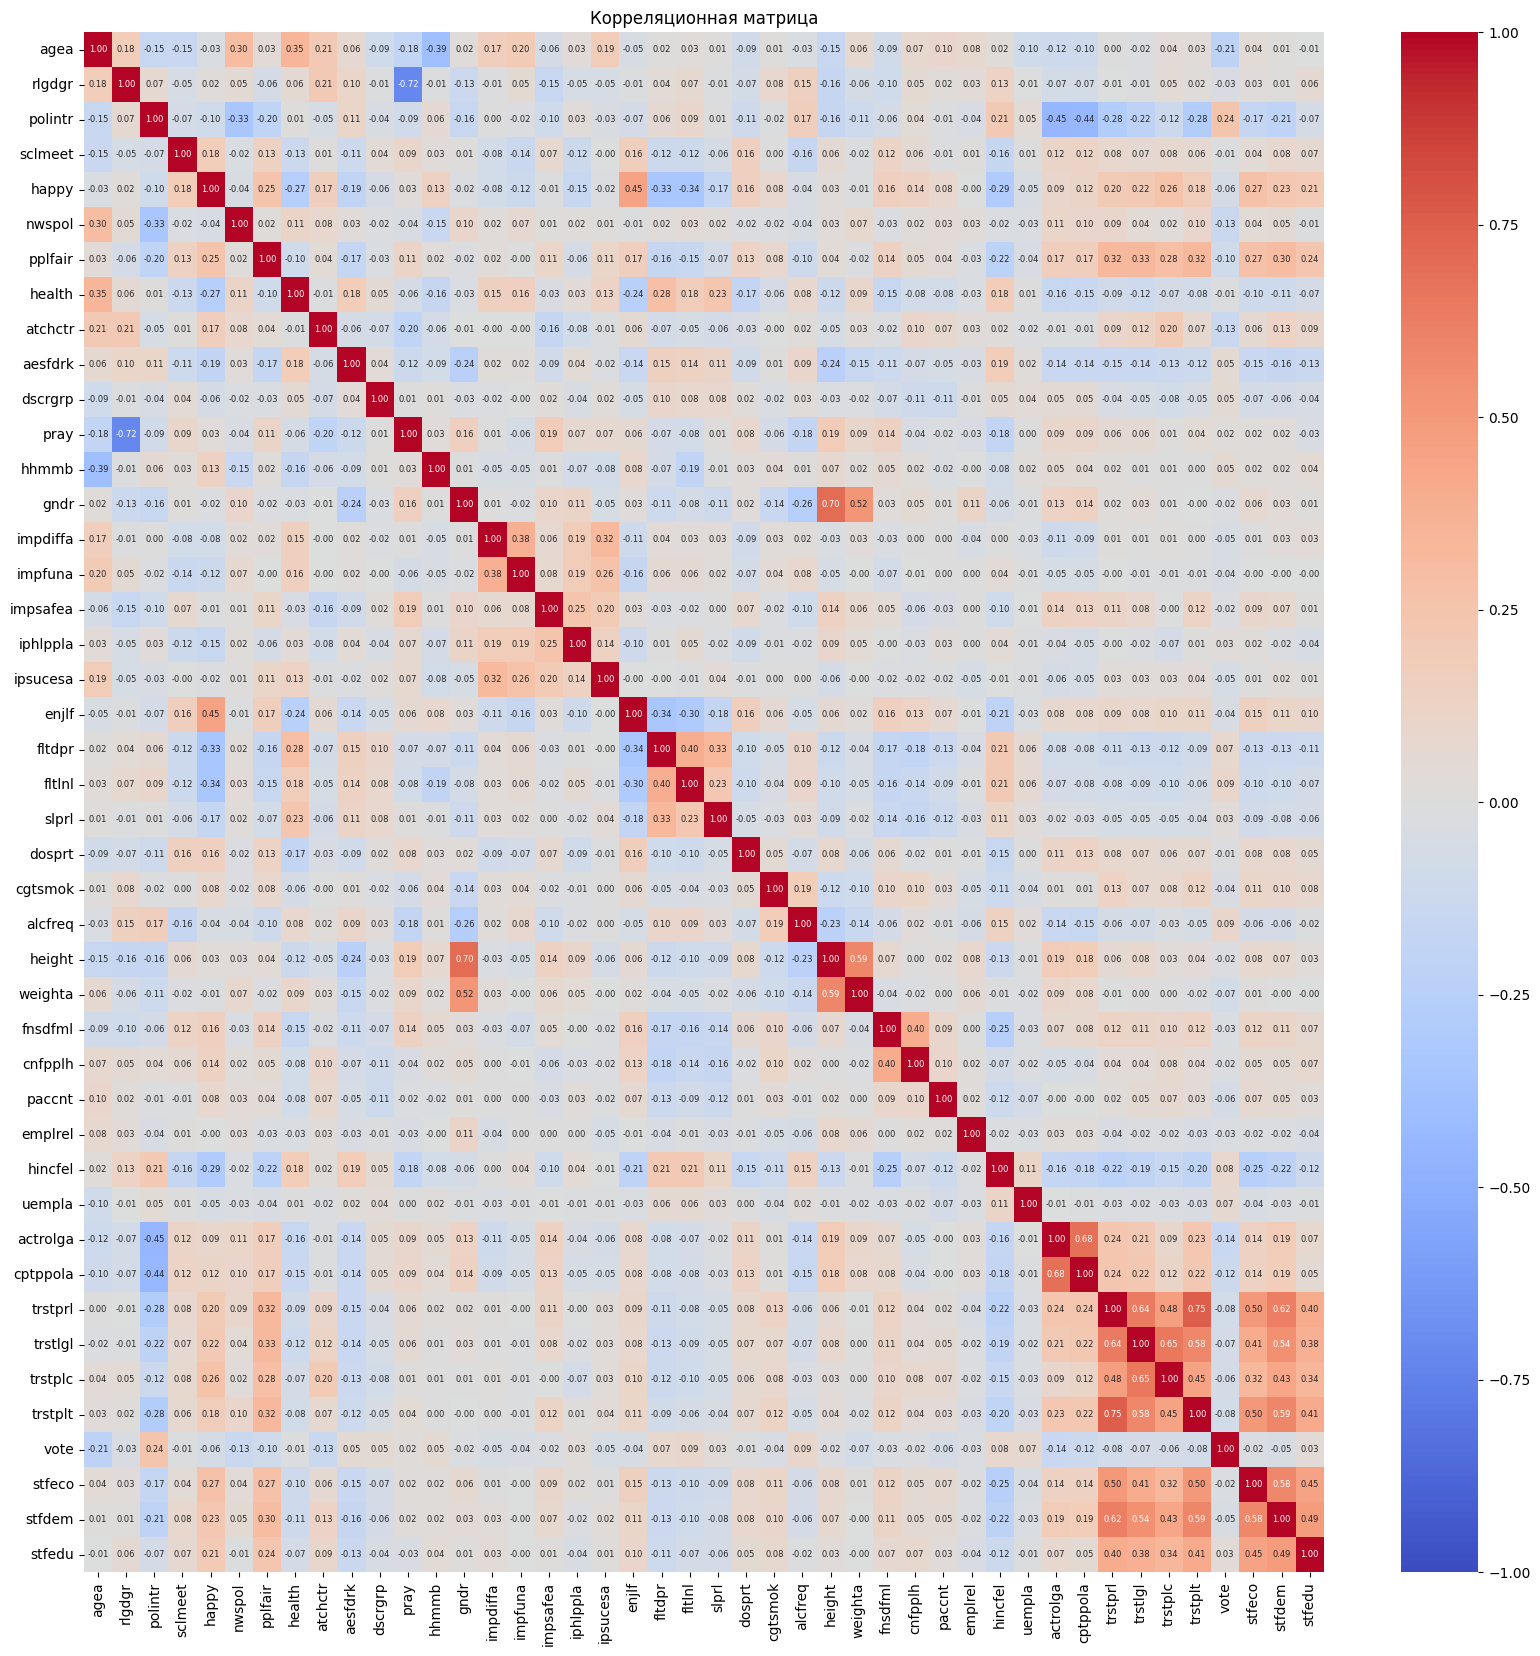

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix , annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, annot_kws={'size':6})
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
# установим порог значимости корреляции и проверим какие пары признаков имеют высокую корреляцию
threshold = 0.7
strong_correlation = correlation_matrix.abs() > threshold
strong_correlation = correlation_matrix[strong_correlation]

strong_correlation_stacked = strong_correlation.stack().reset_index()
strong_correlation_stacked.columns = ['Feature_1', 'Feature_2', 'Correlation']
strong_correlation_stacked = strong_correlation_stacked[strong_correlation_stacked['Feature_1'] < strong_correlation_stacked['Feature_2']]

print("Пары признаков с высокой корреляцией:")
print(strong_correlation_stacked)

Пары признаков с высокой корреляцией:
   Feature_1 Feature_2  Correlation
12      pray    rlgdgr    -0.719130
42   trstplt   trstprl     0.754998


**Выводы**
- ту ту ту
- пу пу пу

### **Интересные факты**

**Завивит ли важность признания своего успеха другими людьми от пола?**

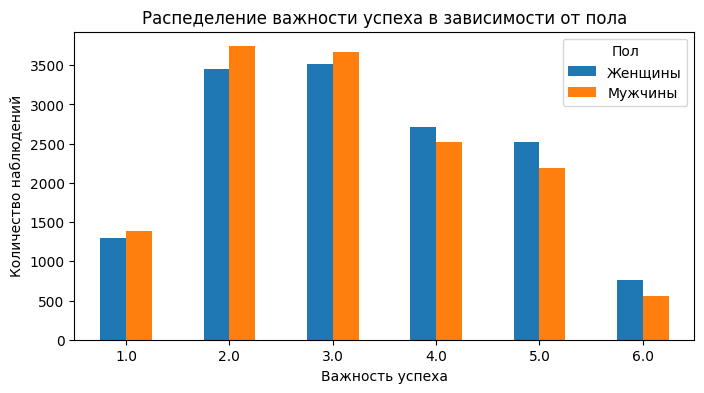

In [ ]:
data_20.pivot_table(index='ipsucesa', columns='gndr', values='idno', aggfunc='count').plot(kind='bar', figsize=(8, 4))
plt.title("Распеделение важности успеха в зависимости от пола")
plt.xlabel("Важность успеха")
plt.ylabel("Количество наблюдений")
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.xticks(rotation = 0)
plt.show()

Как видно из графика, где 1 и 2  говорят о важности признания успеха,то для доля мужчин больше, чем женщин.

**Каково соотношение счастливых и несчастливых людей по странам?**

Рассмотрим признак enjlf. Разделим респондентов на две группы 0 - это те, кто ответил, что не чувствовали себя себя счастливыми за прошлую неделю никогда или иногда, и 1 - те, кто были чувствовали себя счастливыми всегда или почти всегда.

In [ ]:
# приводим к бинарному признаку
data_20['enjlf_cat'] = data_20['enjlf'].apply(lambda x: 0 if x in [1,2] else 1)

# создадим сводную таблицу по странам
data_enjlf = data_20.pivot_table(index='cntry', columns='enjlf_cat', values='idno', aggfunc='count').reset_index()

# найдем долю счастливых людей
data_enjlf['sum'] = data_enjlf.iloc[:, 1:3].sum(axis=1)
data_enjlf['percent_of_happy'] = round(data_enjlf[1] / data_enjlf['sum']*100,2)
# data_enjlf.head()

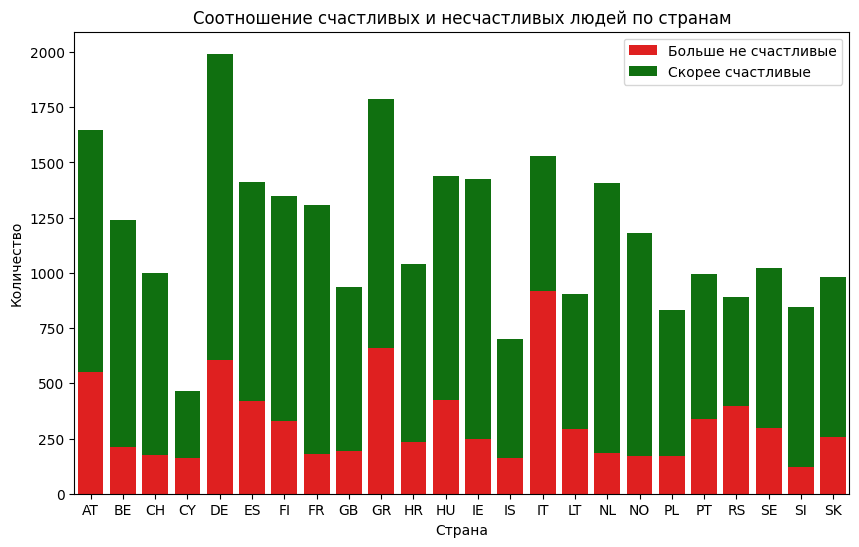

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='cntry', y=0, data=data_enjlf, color='red', label='Больше не счастливые')
sns.barplot(x='cntry', y=1, data=data_enjlf, color='green', label='Скорее счастливые', bottom=data_enjlf[0])

plt.title('Соотношение счастливых и несчастливых людей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [ ]:
top_5 = data_enjlf[['cntry', 'percent_of_happy']].sort_values('percent_of_happy', ascending=False)[:5]
print('Топ 5 стран по наибольшему проценту счастливых резидентов по оценке за неделю в стране')
print(top_5)

Топ 5 стран по наибольшему проценту счастливых резидентов по оценке за неделю в стране
enjlf_cat cntry  percent_of_happy
16           NL             86.90
7            FR             86.40
22           SI             85.66
17           NO             85.58
1            BE             82.84


 В топ-5 стран входят Нидерланды, Франиция, Словения, Норвегия и Бельгия по доле людей, чувствующих себя счастливыми за прошедшею неделю. Как видно из графика количество "несчастливых" людей в Италии больше, чем "счастливых". Так как данный признак схож с целевым признаком, мы его удалим.

**Посмотрим внимательнее на два схожих по смыслу признака про одиночество**

Cоставим сводную таблицу для ответов на вопросы:
- 1) чувствовали вы себя на прошлой неделе одинокими fltdpr,
- 2) сколько времени вы чувствовали себя одинокими на прошлой неделе.

In [ ]:
pivot_data = data_20.pivot_table(index='fltdpr', columns='fltlnl', values='idno', aggfunc='count')
pivot_data

fltlnl,1.0,2.0,3.0,4.0
fltdpr,,,,
1.0,15691,2853,256,115
2.0,3997,3206,604,147
3.0,326,367,292,130
4.0,103,61,80,90


<Figure size 1000x600 with 0 Axes>

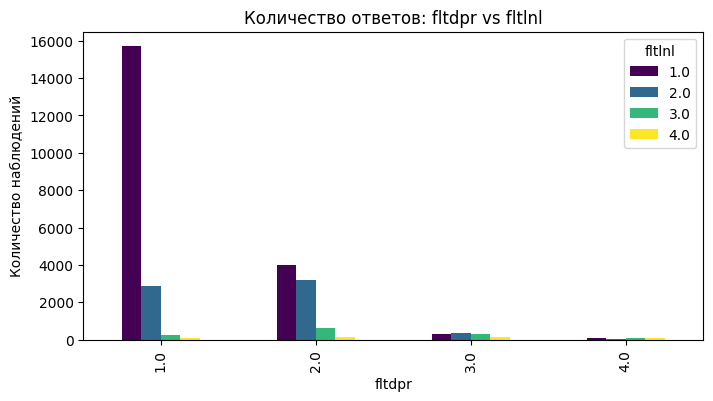

In [ ]:
plt.figure(figsize=(10, 6))

pivot_data.plot(kind='bar', figsize=(8, 4), colormap='viridis')

plt.title("Количество ответов: fltdpr vs fltlnl")
plt.xlabel("fltdpr")
plt.ylabel("Количество наблюдений")
plt.legend(title='fltlnl')
plt.show()

Большинство ответов совпадает, но есть интересный момент - 115 человек, ответили что не чувствовали себя одинокими на прошлой неделе(1), но отвечая на 2 вопрос ответили, что почти всегда чувствовали себя одинокими(4), и наоборот 103 человека. Оставим только признак fltdpr,  fltlnl - удалим.

**Подробнее про физиологические показатели и образ жизни**

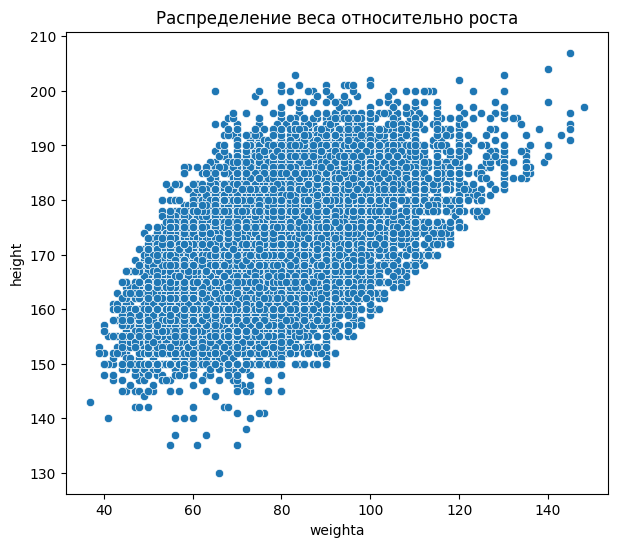

In [ ]:
plt.figure(figsize = (7, 6))

sns.scatterplot(x=data_20['weighta'], y=data_20['height'])
plt.title('Распределение веса относительно роста')
plt.show()

Так как есть зависимость между ростом и весом, мы создадим новый признак индекс массы тела BMI, вычисляемый по формуле I= m/h*2,  m — масса тела в килограммах, h — рост в метрах.

Разделим на категории:

- 1 - 16 и менее (Выраженный дефицит массы тела)
- 2 - 16—18,5	(Недостаточная (дефицит) масса тела)
- 3 - 18,5—25	(Норма)
- 4 - 25—30	(Избыточная масса тела (предожирение))
- 5 - 30—35	(Ожирение 1 степени)
- 6 - 35—40	(Ожирение 2 степени)
- 7 - 40 и более	(Ожирение 3 степени)


In [ ]:
data_20['bmi'] = data_20['weighta']/(data['height']/100)**2

bins = [0, 16, 18.5, 25, 30, 35, 40, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7]
data_20['bmi_cat'] = pd.cut(data_20['bmi'], bins=bins, labels=labels, right=False)

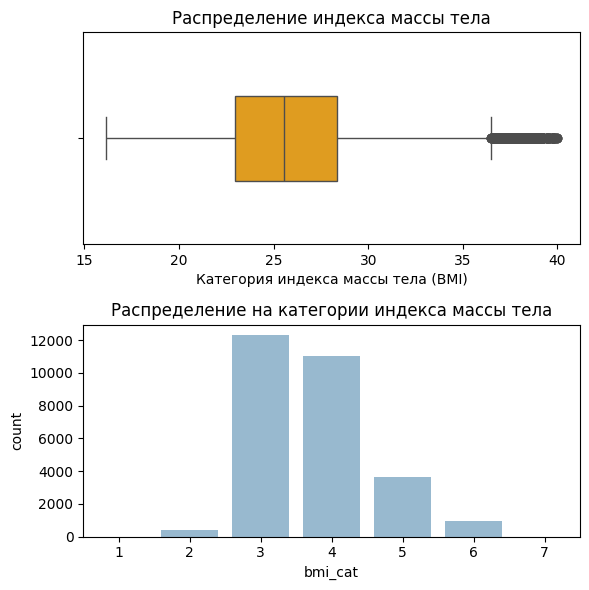

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6))


sns.boxplot(x=data_20['bmi'], ax=ax[0], color='orange', width = 0.4)
ax[0].set_xlabel('Индекс массы тела (BMI)')
ax[0].set_title('Распределение индекса массы тела')

sns.countplot(x=data_20['bmi_cat'], ax=ax[1],alpha=0.5)
ax[0].set_xlabel('Категория индекса массы тела (BMI)')
ax[1].set_title('Распределение на категории индекса массы тела')


plt.tight_layout()
plt.show()

In [ ]:
Q1 = data_20['bmi'].quantile(0.25)
Q3 = data_20['bmi'].quantile(0.75)
IQR = Q3 - Q1

# верхняя и нижние границы межквартильного размаха
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((data_20['bmi'] < lower_bound) | (data_20['bmi'] > upper_bound)).sum()
print(f'Верхняя граница: {upper_bound}')
print(f'Нижняя граница: {lower_bound}')
print(f'Количество выбросов: {outliers}, что составляет {round(outliers/data_20.shape[0]*100,2)}%')


Верхняя граница: 36.51208243852515
Нижняя граница: 14.809735728178971
Количество выбросов: 513, что составляет 1.81%


Большинство респондентов имеет нормальный и чуть выше среднего индекс массы тела. Признак 'bmi' имеет небольшое количество выбросов, поэтому чтобы не удалять данные, мы оставим только признак 'bmi_cat'.

In [ ]:
# создадим новый бинарный признак физической активности, где 0 - нет занятий спортом и 1 - есть занятия спортом
data_20['dosprt_cat'] = data_20['dosprt'].apply(lambda x: 0 if x == 0 else 1)

# создадим новый бинарный признак отношения к курению, где 0 - не курит и 1 - курит
data_20['cgtsmok_cat'] = data_20['cgtsmok'].apply(lambda x: 0 if x in [4, 5, 6] else 1)

# создадим новый бинарный признак отношения к алкоголю, где 0 - не употребляет алкоголь и 1 - употребляет редко
data_20['alcfreq_cat'] = data_20['alcfreq'].apply(lambda x: 0 if x in [6,7] else 1)


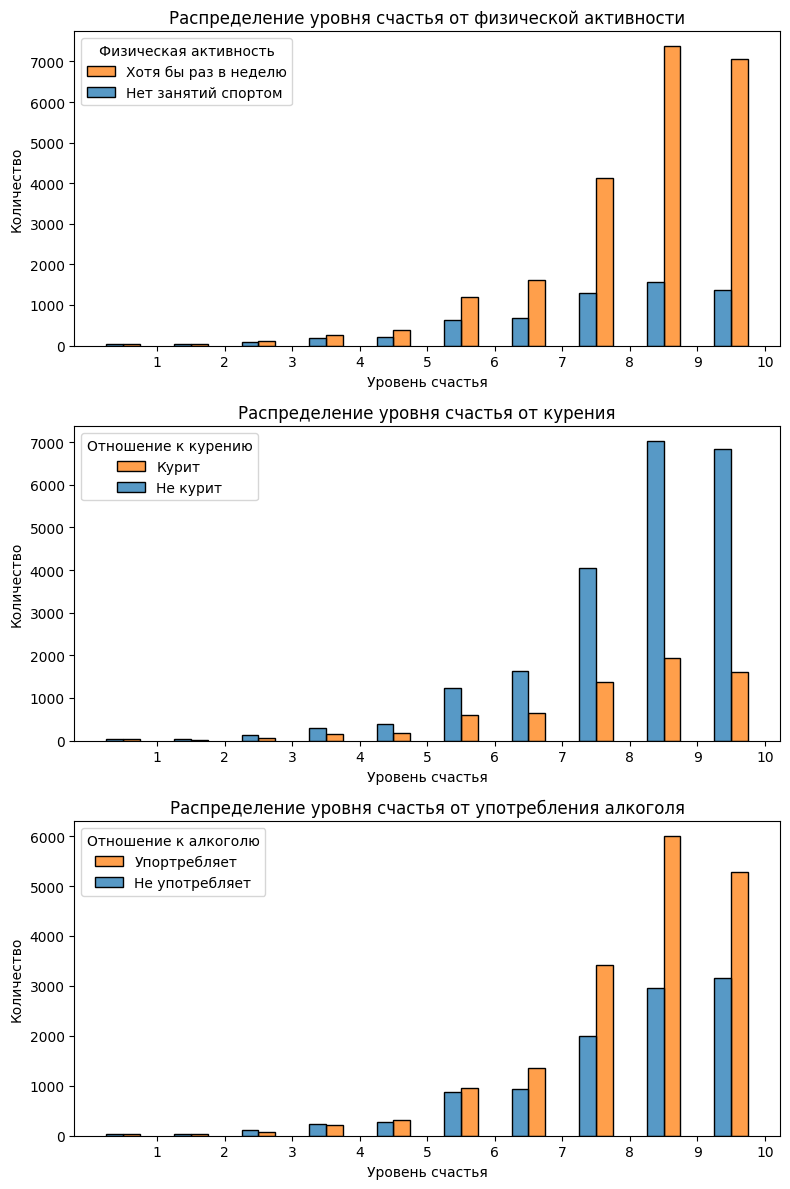

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

sns.histplot(data=data_20, x='happy', bins=10, hue='dosprt_cat', multiple="dodge",shrink=.5, ax=ax[0])
ax[0].set_title('Распределение уровня счастья от физической активности')
ax[0].set_xlabel('Уровень счастья')
ax[0].set_ylabel('Количество')
ax[0].set_xticks(np.arange(1, 11, 1))
ax[0].legend(title='Физическая активность', labels=[ 'Хотя бы раз в неделю', 'Нет занятий спортом'])


sns.histplot(data=data_20, x='happy', hue='cgtsmok_cat', bins=10, multiple="dodge",shrink=.5, ax=ax[1])
ax[1].set_title('Распределение уровня счастья от курения')
ax[1].set_xlabel('Уровень счастья')
ax[1].set_ylabel('Количество')
ax[1].set_xticks(np.arange(1, 11, 1))
ax[1].legend(title='Отношение к курению', labels=[ 'Курит', 'Не курит'])


sns.histplot(data=data_20, x='happy', hue='alcfreq_cat', bins=10, multiple="dodge",shrink=.5)
ax[2].set_title('Распределение уровня счастья от употребления алкоголя')
ax[2].set_xlabel('Уровень счастья')
ax[2].set_ylabel('Количество')
ax[2].set_xticks(np.arange(1, 11, 1))
ax[2].legend(title='Отношение к алкоголю', labels=[ 'Упортребляет', 'Не употребляет'])

plt.tight_layout()
plt.show()

Физическая активность и отказ от курения характерен для респондентов с более высоким уровнем счастья. С другой стороны, большее число респондентов с высоким уровнем счастья предпочитают употреблять алкоголь, чем те, кто отказывается от алкоголя.

In [ ]:
columns_to_drop = ['fltlnl','enjlf','weighta', 'height','alcfreq','bmi','cgtsmok','dosprt']

In [ ]:
data_20_cleaned = data_20.drop(columns=columns_to_drop, axis=1)

### **Общие выводы**